In [1]:
%matplotlib inline
import numpy as np;
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [2]:
#    print('M=',M,' m1=',m1,' m2=',m2,' m3=',m3)
def S12min(masses):
    [M,m1,m2,m3]=masses;
    return (m1+m2)**2
def S12max(masses):
    [M,m1,m2,m3]=masses;
    return (M-m3)**2
def showDalitzRegion(reac):
    s12_=np.linspace(S12min(reac),S12max(reac),100)
    plt.fill_between(s12_,S13min(reac,s12_),S13max(reac,s12_))
def S23min(reac,s12):
    [M,m1,m2,m3]=reac;
    m12=np.sqrt(s12)
    E2=(m12**2-m1**2+m2**2)/(2*m12)
    p2=np.sqrt(E2**2-m2**2)
    E3=(M**2-m12**2-m3**2)/(2*m12)
    p3=np.sqrt(E3**2-m3**2)
    EE=(E2+E3)**2
    return (E2+E3)**2-(p2+p3)**2
def S23max(reac,s12):
    [M,m1,m2,m3]=reac;
    m12=np.sqrt(s12)
    E2=(m12**2-m1**2+m2**2)/(2*m12)
    p2=np.sqrt(E2**2-m2**2)
    E3=(M**2-m12**2-m3**2)/(2*m12)
    p3=np.sqrt(E3**2-m3**2)
    EE=(E2+E3)**2
    return (E2+E3)**2-(p2-p3)**2
def intDalitz(reac,func,error=False):
    res=integrate.quad(lambda s12: func(s12)*(S13max(reac,s12)-S13min(reac,s12)),S12min(reac),S12max(reac))
    if(error):
        return res
    else:
        return res[0]



In [3]:
alpha=1./137;
mmu=0.1056;
Mchi=3.4147501;
Mpsi=3.0969160;

In [48]:
def matr2(q2,m2PsiK1,J=0):
    if(J==0):
        return (16*alpha*np.pi*(2*mmu**4*q2 + Mchi**4*(2*mmu**2 + q2) + 2*mmu**2*(Mpsi**4 - 2*m2PsiK1*q2
        + 3*Mpsi**2*q2) + q2*(2*m2PsiK1**2 - 2*m2PsiK1*(Mpsi**2 - q2) + (Mpsi**2 + q2)**2) - 
       2*Mchi**2*(q2*(m2PsiK1 + q2) + mmu**2*(2*Mpsi**2 + q2))))/(q2**2*(-Mchi**2 + Mpsi**2 + q2)**2)
    if(J==1):
        return (4*alpha*np.pi*(Mchi**6*(2*mmu**2 + q2) - Mchi**4*(2*mmu**2*(Mpsi**2 + q2) + 
            q2*(2*m2PsiK1 - Mpsi**2 + 2*q2)) + Mpsi**2*(2*mmu**4*q2 + (2*m2PsiK1**2 - 
            2*m2PsiK1*(Mpsi**2 - q2) + (Mpsi**2 - q2)**2)*q2 + 2*mmu**2*(Mpsi**4 - 2*m2PsiK1*q2 - Mpsi**2*q2)) + 
            Mchi**2*(2*mmu**4*q2 - 2*mmu**2*(Mpsi**4 + 2*m2PsiK1*q2 - 6*Mpsi**2*q2) + q2*(2*m2PsiK1**2 
            - 4*m2PsiK1*Mpsi**2 + Mpsi**4 + 2*m2PsiK1*q2 + 4*Mpsi**2*q2 + q2**2))))/(Mchi**2*Mpsi**2*q2**2)
    if(J==2):
        return (alpha*np.pi*(3*Mchi**10*(2*mmu**2 + q2) - 8*(m2PsiK1 - mmu**2)*(Mpsi**2 - q2)**2*
        q2**2*(m2PsiK1 - mmu**2 - Mpsi**2 + q2) + 2*Mchi**8*(mmu**2*(28*Mpsi**2 - 9*q2) + (-3*m2PsiK1 
        + 17*Mpsi**2 - 6*q2)*q2) + 2*Mchi**6*(3*mmu**4*q2 - mmu**2*(62*Mpsi**4 + 6*m2PsiK1*q2 + 19*Mpsi**2*q2 - 5*q2**2)
        + q2*(3*m2PsiK1**2 - 37*m2PsiK1*Mpsi**2 + 3*Mpsi**4 + 13*m2PsiK1*q2 - 38*Mpsi**2*q2 + 9*q2**2)) + 
        2*Mchi**4*(2*mmu**4*(17*Mpsi**2 - 5*q2)*q2 + mmu**2*(28*Mpsi**6 + 105*Mpsi**4*q2 + q2**2*(20*m2PsiK1 + 9*q2) -
        2*Mpsi**2*q2*(34*m2PsiK1 + 29*q2)) + q2*(17*Mpsi**6 + 2*m2PsiK1**2*(17*Mpsi**2 - 5*q2) - 8*Mpsi**4*q2 + 
        25*Mpsi**2*q2**2 - 6*q2**3 + m2PsiK1*(-37*Mpsi**4 + 86*Mpsi**2*q2 - 21*q2**2))) +
        Mchi**2*(2*mmu**4*q2*(3*Mpsi**4 - 42*Mpsi**2*q2 + 11*q2**2) + 2*mmu**2*(3*Mpsi**8 + 3*Mpsi**6*q2 -
        2*q2**3*(11*m2PsiK1 + 6*q2) - Mpsi**4*q2*(6*m2PsiK1 + 55*q2) + Mpsi**2*q2**2*(84*m2PsiK1 + 61*q2))
        + q2*((Mpsi**2 - q2)**2*(3*Mpsi**4 - 2*Mpsi**2*q2 + 3*q2**2) + m2PsiK1**2*(6*Mpsi**4 - 84*Mpsi**2*q2 +
        22*q2**2) + m2PsiK1*(-6*Mpsi**6 + 98*Mpsi**4*q2 - 122*Mpsi**2*q2**2 + 30*q2**3)))))/(3.*Mchi**4*Mpsi**2*q2**2)

In [49]:
def dGamma_DQ2(q2,J=0,error=False):
    reac=[Mchi,mmu,mmu,Mpsi]
    res=integrate.quad(lambda s23: matr2(q2,s23,J=J),S23min(reac,q2),S23max(reac,q2))
    if(error):
        return res
    else:
        return res[0]
def dGamma_Dm2PsiK1(s23,J=0,error=False):
    reac=[Mchi,Mpsi,mmu,mmu]
    res=integrate.quad(lambda q2: matr2(q2,s23,J=J),S23min(reac,s23),S23max(reac,s23))
    if error:
        return res
    else:
        return res[0]

In [133]:
def genPlot(math,root,axe=None,axeR=None):
    if(axe==None):
        axe=plt.gca();
    int_=np.trapz(root[:,1],root[:,0]);
    root[:,1]=root[:,1]/int_
    root[:,2]=root[:,2]/int_;
    math[:,1]=math[:,1]/np.trapz(math[:,1],math[:,0]);
    axe.plot(math[:,0],math[:,1],'r',label='math');
    axe.errorbar(root[:,0],root[:,1],yerr=root[:,2],label='EvtGen')
    axe.legend(loc='best')
    if(axeR):
        axeR.plot(math[:,0],root[:,1]/math[:,1],label="EvtGen/math")
        axeR.set_ylim(0,1.3)
        axeR.legend(loc='best')

In [143]:
dataDir='../root_files2/hst/'
def genPlotM2PsiK1(J,axe=None):
    if(axe==None):
        axe=plt.gca();
    reac=[Mchi,mmu,Mpsi,mmu]
    e=1e-3
    s23_=np.linspace((1+e)*S12min(reac),(1-e)*S12max(reac),100)
    math=[ [s23,dGamma_Dm2PsiK1(s23,J=J)] for s23 in s23_]
    math=np.array(math)
    math[:,1]=math[:,1]/np.trapz(math[:,1],math[:,0]);
    root=np.loadtxt(dataDir+'hm2PsiK1_chic'+str(J)+'_3body_new.hst')
    int_=np.trapz(root[:,1],root[:,0]);
    root[:,1]=root[:,1]/int_
    root[:,2]=root[:,2]/int_;
    axe.plot(math[:,0],math[:,1],'r',label='math');
    axe.errorbar(root[:,0],root[:,1],yerr=root[:,2],label='EvtGen');
    axe.legend(loc='best')
    axe.set_xlabel(r'$m_{\psi\mu}^2$')

In [174]:
def genPlotQ2(J,axe=None,axeR=None):
    root=np.loadtxt(dataDir+"hQ2_chic"+str(J)+"_3body_new.hst")
    reac=[Mchi,mmu,mmu,Mpsi]
    e=1e-3;
    root=np.array([r for r in root if (r[0]>(1+e)*S12min(reac) and r[0]<(1-e)*S12max(reac))])
    q2_=root[:,0]
    math=np.array([[q2,dGamma_DQ2(q2,J=J)] for q2 in q2_])
    genPlot(math,root,axe,axeR)
    axeR.set_xlabel(r'$q^2$')
def genPlotM2PsiK1(J,axe=None,axeR=None):
    root=np.loadtxt(dataDir+'hm2PsiK1_chic'+str(J)+'_3body_new.hst')
    reac=[Mchi,mmu,Mpsi,mmu]
    e=1e-3
    root=np.array([r for r in root if (r[0]>(1+e)*S12min(reac) and r[0]<(1-e)*S12max(reac))])
    s23_=root[:,0]
    math=np.array([ [s23,dGamma_Dm2PsiK1(s23,J=J)] for s23 in s23_])
    genPlot(math,root,axe,axeR)
    axeR.set_xlabel(r'$m_{\psi\mu}^2$')


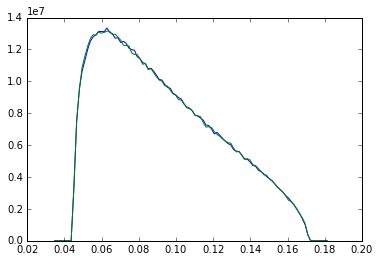

In [175]:
root_old=np.loadtxt('../root_files2/hst/hQ2_chic1_3body_old.hst')
root_new=np.loadtxt('../root_files2/hst/hQ2_chic1_3body_new.hst')
plt.plot(root_old[:,0],root_old[:,1])
plt.plot(root_new[:,0],root_new[:,1])

/Users/luchinsky/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


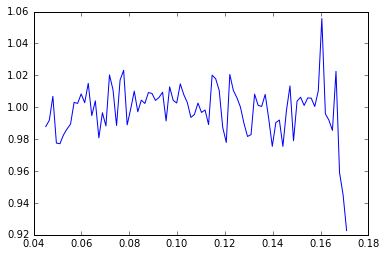

In [176]:
plt.plot(root_old[:,0],root_old[:,1]/root_new[:,1])

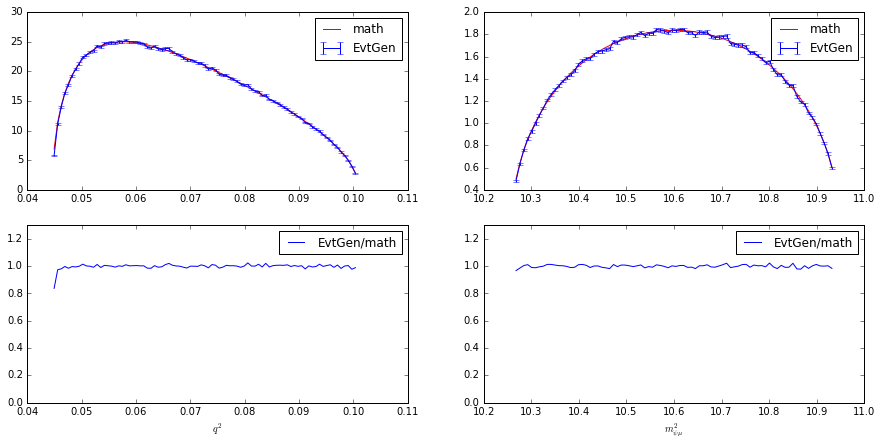

In [177]:
size=(15,7)
Mchi=3.4147501;
fig,axes=plt.subplots(2,2,figsize=size)
genPlotQ2(0,axes[0,0],axes[1,0]);
genPlotM2PsiK1(0,axes[0,1],axes[1,1]);
plt.savefig("chi_c0.pdf")

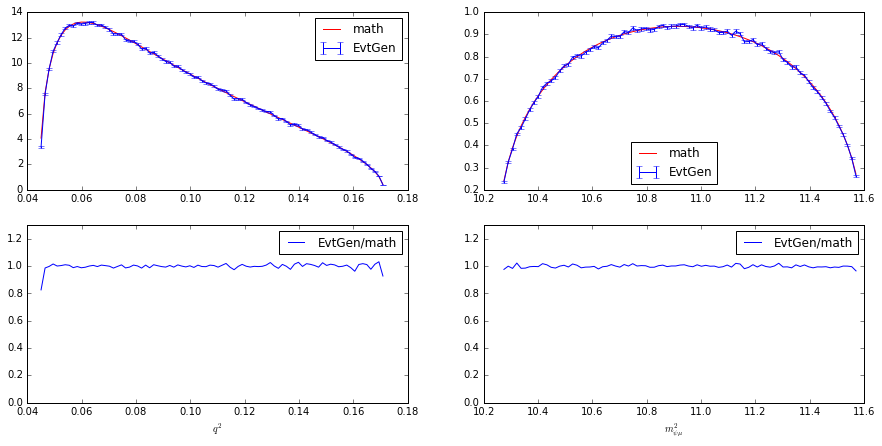

In [178]:
size=(15,7)
Mchi=3.5106599
fig,axes=plt.subplots(2,2,figsize=size)
genPlotQ2(1,axes[0,0],axes[1,0]);
genPlotM2PsiK1(1,axes[0,1],axes[1,1]);
plt.savefig("chi_c1.pdf")

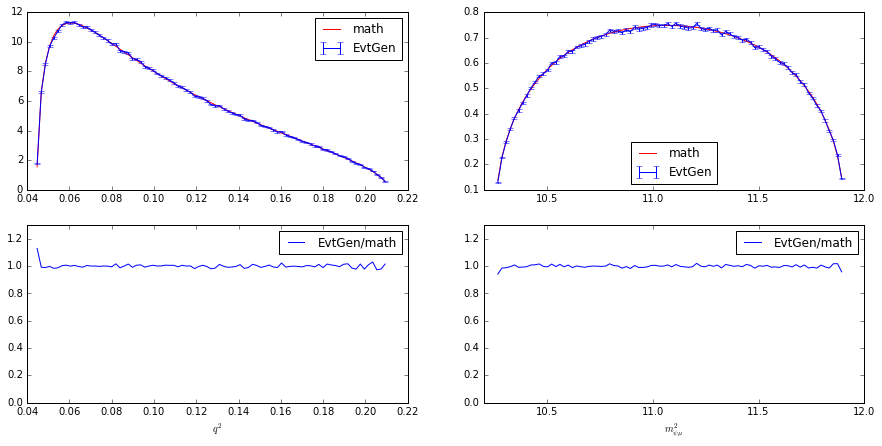

In [179]:
size=(15,7)
Mchi=3.5562000;
fig,axes=plt.subplots(2,2,figsize=size)
genPlotQ2(2,axes[0,0],axes[1,0]);
genPlotM2PsiK1(2,axes[0,1],axes[1,1]);
plt.savefig("chi_c2.pdf")